### Importing all the important tools(libraries) required

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [195]:
data=pd.read_excel('agent_followup_data.xlsx',sheet_name='Dataset')

In [196]:
df=pd.DataFrame(data)

In [197]:
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data
0,1,2020-03-05 14:38:54,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
1,2,2020-03-05 14:38:55,2019-11-04 16:12:00-05:00,20293,calls,10,"{'duration': 0, 'is_incoming': False}"
2,3,2020-01-06 19:11:39,2019-12-26 08:30:32-05:00,49122,calls,4,"{'duration': 91, 'is_incoming': False}"
3,4,2020-08-31 13:12:53,2020-08-30 19:39:18-04:00,58040,calls,9,"{'duration': 0, 'is_incoming': False}"
4,5,2020-10-14 14:47:23,2017-01-28 11:04:00-05:00,36567,calls,9,"{'duration': 0, 'is_incoming': False}"


#### Checking the type of data and also checking for null values

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68354 entries, 0 to 68353
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               68354 non-null  int64 
 1   followup_date    68354 non-null  object
 2   lead_created_at  68354 non-null  object
 3   leadId           68354 non-null  int64 
 4   followup_type    68354 non-null  object
 5   agentId          68354 non-null  int64 
 6   additional_data  68354 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.7+ MB


### General EDA with respect to the agentId and their follow-up methods
###### Following up is a prime factor in CRM, the method also plays an important role. 

In [199]:
df['followup_date']=pd.to_datetime(df['followup_date'],utc=False)
df['f_date'] = df['followup_date'].dt.date

In [200]:
df['lead_created_at']=pd.to_datetime(df['followup_date'],utc=False)
df['lead_date'] = df['lead_created_at'].dt.date

In [201]:
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,f_date,lead_date
0,1,2020-03-05 14:38:54,2020-03-05 14:38:54,20293,calls,10,"{'duration': 0, 'is_incoming': False}",2020-03-05,2020-03-05
1,2,2020-03-05 14:38:55,2020-03-05 14:38:55,20293,calls,10,"{'duration': 0, 'is_incoming': False}",2020-03-05,2020-03-05
2,3,2020-01-06 19:11:39,2020-01-06 19:11:39,49122,calls,4,"{'duration': 91, 'is_incoming': False}",2020-01-06,2020-01-06
3,4,2020-08-31 13:12:53,2020-08-31 13:12:53,58040,calls,9,"{'duration': 0, 'is_incoming': False}",2020-08-31,2020-08-31
4,5,2020-10-14 14:47:23,2020-10-14 14:47:23,36567,calls,9,"{'duration': 0, 'is_incoming': False}",2020-10-14,2020-10-14


In [202]:
df['f_date']=pd.to_datetime(df['f_date'])
df['lead_date']=pd.to_datetime(df['lead_date'])

In [203]:
df.head()

,id,followup_date,lead_created_at,leadId,followup_type,agentId,additional_data,f_date,lead_date
0,1,2020-03-05 14:38:54,2020-03-05 14:38:54,20293,calls,10,"{'duration': 0, 'is_incoming': False}",2020-03-05,2020-03-05
1,2,2020-03-05 14:38:55,2020-03-05 14:38:55,20293,calls,10,"{'duration': 0, 'is_incoming': False}",2020-03-05,2020-03-05
2,3,2020-01-06 19:11:39,2020-01-06 19:11:39,49122,calls,4,"{'duration': 91, 'is_incoming': False}",2020-01-06,2020-01-06
3,4,2020-08-31 13:12:53,2020-08-31 13:12:53,58040,calls,9,"{'duration': 0, 'is_incoming': False}",2020-08-31,2020-08-31
4,5,2020-10-14 14:47:23,2020-10-14 14:47:23,36567,calls,9,"{'duration': 0, 'is_incoming': False}",2020-10-14,2020-10-14


<AxesSubplot:>

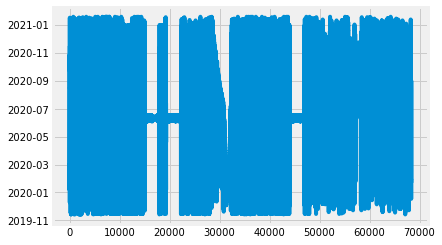

In [214]:
df['f_date'].plot()

<AxesSubplot:>

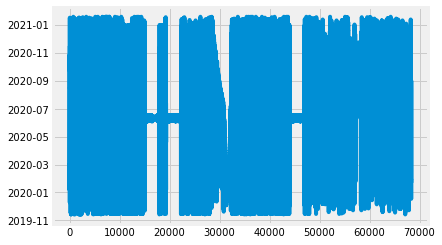

In [215]:
df['lead_date'].plot()

In [65]:
df['agentId'].value_counts()

4     15290
10    11655
5     11241
9      9281
7      7819
6      5606
2      4086
8      2732
3       529
0       115
Name: agentId, dtype: int64

In [67]:
df['followup_type'].value_counts()

emails          44757
textmessages    20292
calls            3305
Name: followup_type, dtype: int64

In [72]:
group=df.groupby(["agentId", "followup_type"])

#### The following table gives us a lowdown of the efforts by various agents in order to pursue more leads. 
###### On the basis of the below data, the recommendations can be made to the agents. 

In [74]:
group.count()

id  followup_date  lead_created_at  leadId  \
agentId followup_type                                                  
0       textmessages     115            115              115     115   
2       calls             65             65               65      65   
        emails          3706           3706             3706    3706   
        textmessages     315            315              315     315   
3       emails           516            516              516     516   
        textmessages      13             13               13      13   
4       calls           1087           1087             1087    1087   
        emails          7140           7140             7140    7140   
        textmessages    7063           7063             7063    7063   
5       calls              6              6                6       6   
        emails         11065          11065            11065   11065   
        textmessages     170            170              170     170   
6       calls            210            210              210     210   
        emails          2256           2256             2256    2256   
        textmessages    3140           3140             3140    3140   
7       calls            183            183              183     183   
        emails          5207           5207             5207    5207   
        textmessages    2429           2429             2429    2429   
8       calls            293            293              293     293   
        emails          1945           1945             1945    1945   
        textmessages     494            494              494     494   
9       calls            814            814              814     814   
        emails          7292           7292             7292    7292   
        textmessages    1175           1175             1175    1175   
10      calls            647            647              647     647   
        emails          5630           5630             5630    5630   
        textmessages    5378           5378             5378    5378   

                       additional_data  
agentId followup_type                   
0       textmessages               115  
2       calls                       65  
        emails                    3706  
        textmessages               315  
3       emails                     516  
        textmessages                13  
4       calls                     1087  
        emails                    7140  
        textmessages              7063  
5       calls                        6  
        emails                   11065  
        textmessages               170  
6       calls                      210  
        emails                    2256  
        textmessages              3140  
7       calls                      183  
        emails                    5207  
        textmessages              2429  
8       calls                      293  
        emails                    1945  
        textmessages               494  
9       calls                      814  
        emails                    7292  
        textmessages              1175  
10      calls                      647  
        emails                    5630  
        textmessages              5378

In [152]:
#n = 3
#df['agentId'].value_counts()[:n].index.tolist()

#### A simple algorithm which returns the list of top 3 agents

In [87]:
def top_3_agents(x,col, n=3):
    return x[col].value_counts()[:n].index.tolist()

In [88]:
top_3_agents(df,'agentId')

[4, 10, 5]

#### Visualizations with respect to the agent activities are made below to understand them better.

#### All the activities captured in the first graph.

<AxesSubplot:title={'center':'Agent Activity'}, xlabel='agentId,followup_type'>

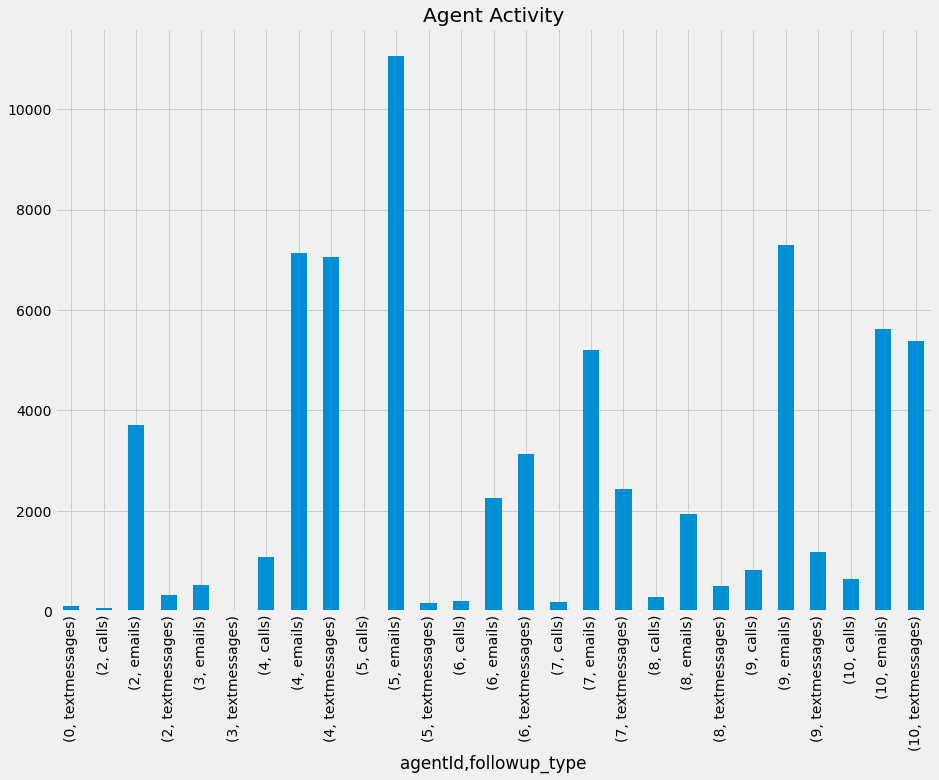

In [140]:
plt.figure(figsize=(14,10))
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.title('Agent Activity')

groups = df.groupby(['agentId','followup_type']).size()
groups.plot.bar(stacked=True)


In [107]:
#fig, ax = plt.subplots(figsize=(15,7))
#df.groupby(['agentId','followup_type']).count().plot(ax=ax)

In [117]:
df_calls=df[df['followup_type']=='calls']
df_calls.drop(['id', 'followup_date', 'lead_created_at','leadId', 'additional_data'],axis='columns',inplace=True)

In [118]:
df_calls.columns

Index(['followup_type', 'agentId'], dtype='object')

#### The graph below gives the data for the calls by various agents. 

<AxesSubplot:title={'center':'Number of calls made by Agents'}, xlabel='agentId,followup_type'>

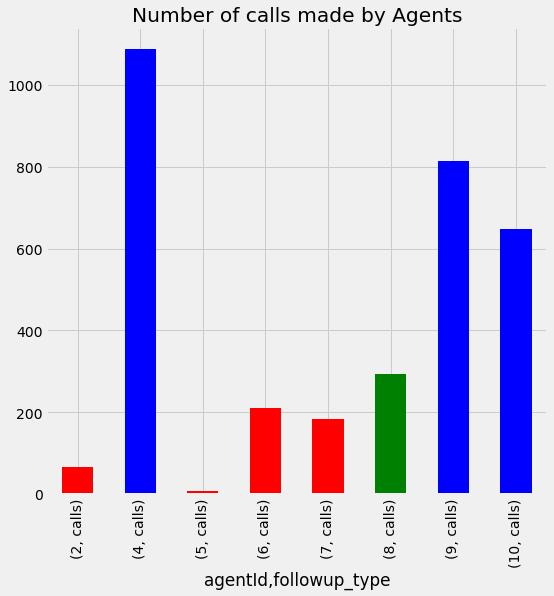

In [143]:
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.title('Number of calls made by Agents')
groups = df_calls.groupby(['agentId','followup_type']).size()
groups.plot.bar(color=['red','blue','red','red','red','green','blue','blue'])

In [144]:
df_emails=df[df['followup_type']=='emails']
df_emails.drop(['id', 'followup_date', 'lead_created_at','leadId', 'additional_data'],axis='columns',inplace=True)

C:\Users\Abhiroop Chakraborty\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### The graph below gives the data for the emails by various agents. 

<AxesSubplot:title={'center':'Number of emails sent by Agents'}, xlabel='agentId,followup_type'>

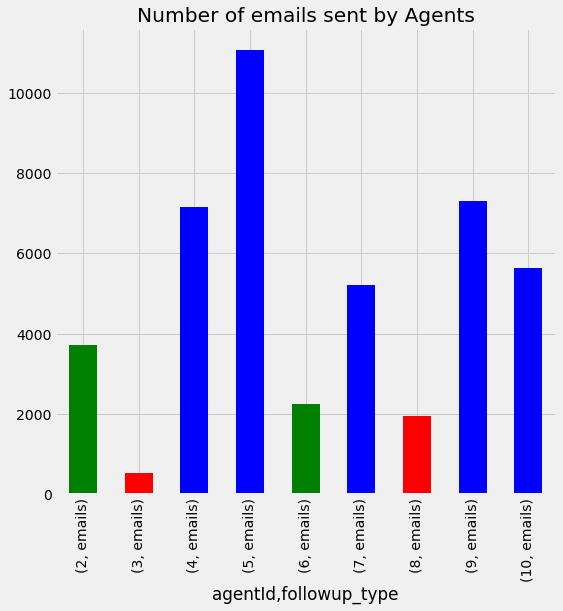

In [146]:
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.title('Number of emails sent by Agents')
groups = df_emails.groupby(['agentId','followup_type']).size()
groups.plot.bar(color=['green','red','blue','blue','green','blue','red','blue','blue'])

In [148]:
df_texts=df[df['followup_type']=='textmessages']
df_texts.drop(['id', 'followup_date', 'lead_created_at','leadId', 'additional_data'],axis='columns',inplace=True)

C:\Users\Abhiroop Chakraborty\anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### The graph below gives the data for the texts by various agents. 

<AxesSubplot:title={'center':'Number of text messages sent by Agents'}, xlabel='agentId,followup_type'>

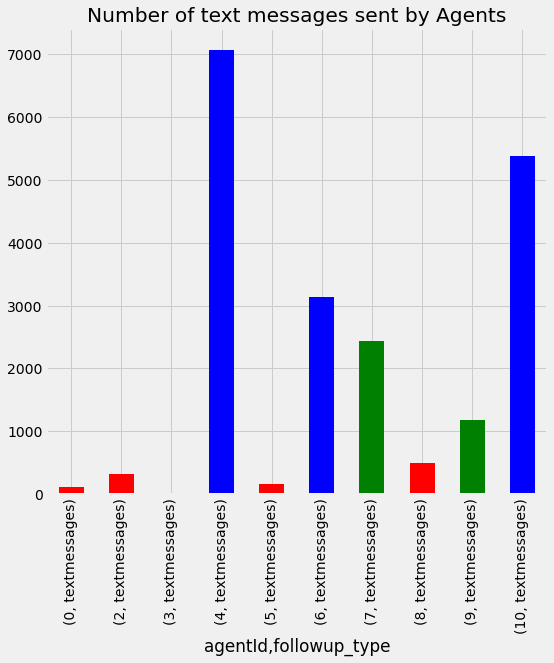

In [150]:
plt.figure(figsize=(8,8))
plt.style.use('fivethirtyeight')
plt.grid(True)
plt.title('Number of text messages sent by Agents')
groups = df_texts.groupby(['agentId','followup_type']).size()
groups.plot.bar(color=['red','red','red','blue','red','blue','green','red','green','blue'])

### Summary
#### CRM department efforts by agentId- Observations

##### Top 3 Agents

1. Agents 4,10 and 5 have had the highest number of leads generated in the above data. 

2. Agent 4 has been very active on all the kinds of follow-up actions, especially on calls, which helps generate more leads 
   due to the personal touch. Agent 4 has made the highest number of calls. 

3. Agent 5 has focused more on the email front and has sent the highest number of emails among all other agents. 

4. Agent 10 has made an effort in all 3 dimensions of the follow-up type. 

#### Other Agents

1. Agent 0 has only made efforts through texts, which has seen the least number of leads. 

2. Agent 3 has made no calls and very few texts and emails.



### Recommendations

- Calls seem to be one of the most significant follow-up methods. It has worked very well for agent 4,9 and 10. 
- When efforts are shared in all 3 methods, leads to good results. Agent 10 happens to be one of them. 
